In [51]:
import pandas as pd


file_path = 'Uni_enrollment.csv'  
data = pd.read_csv(file_path)


data.head(10)


,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
5,6,online,2014,246,50.1,76.0,Beginner,Math
6,7,online,2021,241,87.83,84.0,Beginner,Science
7,8,online,2018,261,76.48,88.0,NaN,Technology
8,9,online,2019,261,83.97,87.0,NaN,Technology
9,10,classroom,2016,180,83.53,79.0,Beginner,Engineering


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [3]:
data.describe()

,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


In [4]:
data.isnull().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [5]:
data = data.dropna()

In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
print(data['course_type'].unique())

['classroom' 'online']


In [20]:
course_counts = data['course_type'].value_counts()

Convert counts to numpy

In [21]:
course_types = course_counts.index.to_numpy()
counts = course_counts.values

Plotting

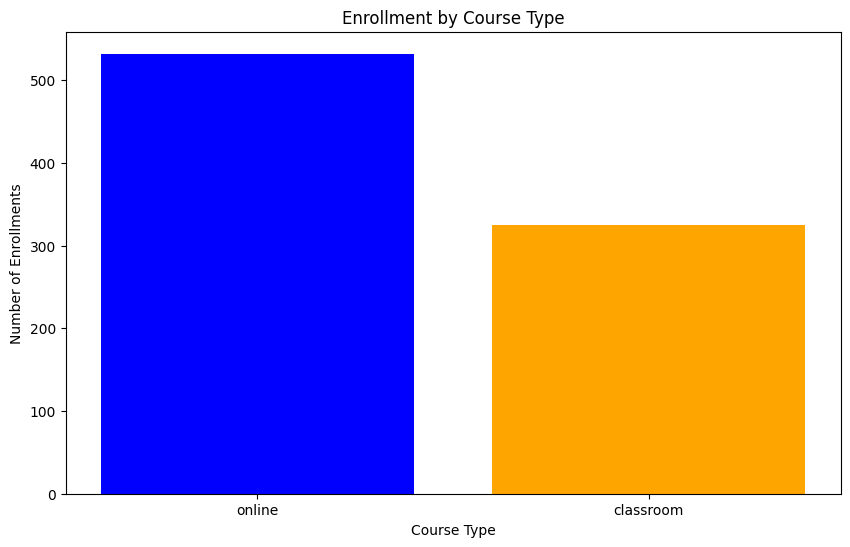

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(course_types, counts, color=['blue', 'orange'])
plt.title('Enrollment by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Number of Enrollments')
plt.show()

Correlation Matrix using Numpy and Matplotlib

In [23]:
print(data.dtypes)

course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object


In [24]:
numeric_data = data.select_dtypes(include=[float, int])

In [25]:
correlation_matrix = numeric_data.corr().to_numpy()

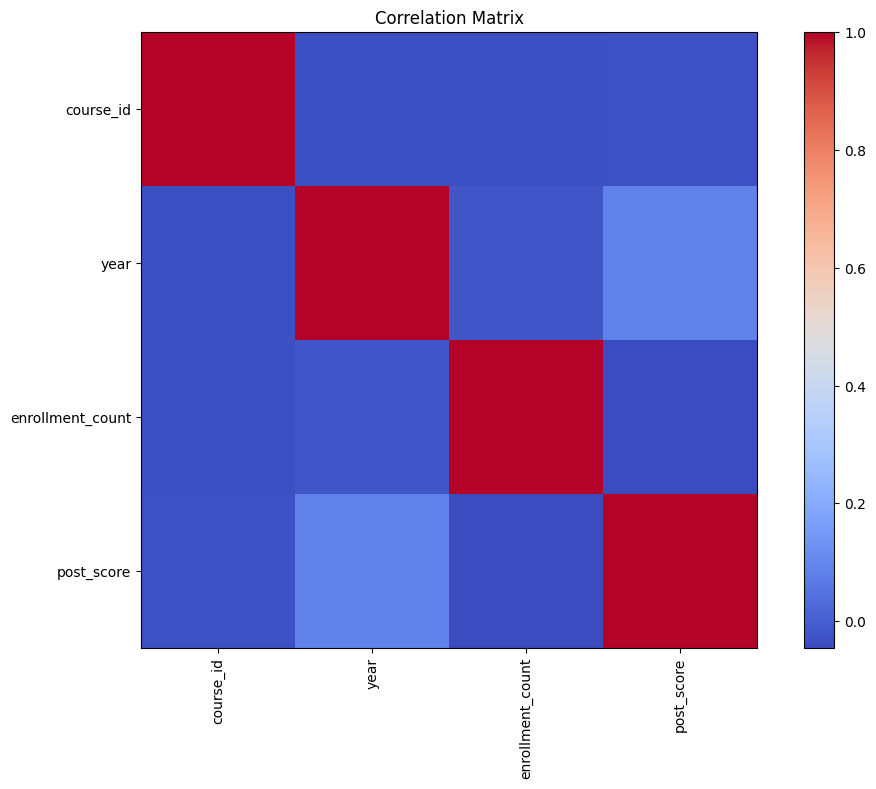

In [26]:
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(numeric_data.columns)), numeric_data.columns, rotation=90)
plt.yticks(np.arange(len(numeric_data.columns)), numeric_data.columns)
plt.title('Correlation Matrix')
plt.show()

Enrollment for T-test for Online vs. Classroom 

In [27]:
from scipy.stats import ttest_ind

print(data['course_type'].unique())
print(data.dtypes)

['classroom' 'online']
course_id             int64
course_type          object
year                  int64
enrollment_count      int64
pre_score            object
post_score          float64
pre_requirement      object
department           object
dtype: object


In [33]:
data['enrollment_count'] = pd.to_numeric(data['enrollment_count'], errors='coerce')


In [34]:
data = data.dropna(subset=['enrollment_count'])

In [35]:
online = data[data['course_type'] == 'online']['enrollment_count']
classroom = data[data['course_type'] == 'classroom']['enrollment_count']

In [36]:
if len(online) > 0 and len(classroom) > 0:
    t_stat, p_val = ttest_ind(online, classroom)
    print(f"T-statistic: {t_stat}, P-value: {p_val}")
else:
    print("One of the groups is empty, cannot perform T-test.")

T-statistic: 177.0383377938837, P-value: 0.0


In [42]:
data['pre_requirement'] = data['pre_requirement'].fillna(891)


In [43]:
data['post_score'] = data['post_score'].fillna(185)


In [50]:
print(data.head(10))

   course_id course_type  year  enrollment_count pre_score  post_score  \
0          1   classroom  2018               165     28.14        73.0   
1          2   classroom  2020               175     79.68        86.0   
2          3      online  2016               257     57.24        80.0   
3          4      online  2013               251     97.67        75.0   
4          5   classroom  2019               165     39.75        76.0   
5          6      online  2014               246      50.1        76.0   
6          7      online  2021               241     87.83        84.0   
7          8      online  2018               261     76.48        88.0   
8          9      online  2019               261     83.97        87.0   
9         10   classroom  2016               180     83.53        79.0   

  pre_requirement   department  
0        Beginner      Science  
1             891      Science  
2             891  Mathematics  
3        Beginner   Technology  
4        Beginner   

In [45]:
data.isnull().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64